In [1]:
# Install Model maker
!pip install -q tflite-model-maker &> /dev/null

In [3]:
# Imports and check that we are using TF2.x
import numpy as np
import os

from tflite_model_maker import configs
from tflite_model_maker import ExportFormat
from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.image_classifier import DataLoader

import tensorflow as tf
assert tf.__version__.startswith('2')
tf.get_logger().setLevel('ERROR')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# import os
# import shutil

# def folder_file_copy():

#   file_cnt = 1
#   for (path, dir, files) in os.walk("/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/파리류/"):
#     for file in files:
#       file_path = os.path.join(path, file)
#       file_cnt += 1
#       dest_path = '/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/파리류/' + file
#       shutil.copy(file_path, dest_path)
#       print('복사 완료')

# folder_file_copy()

In [19]:
import glob
import shutil as sh

class file_processing():
    def __init__(self ,**kwargs):
        if 'path' in kwargs.keys():
            self.path = kwargs['path']
        else:
            self.path = None

    def find_file_path_lv1(self):
        ### 대상 파일 경로 확인 ###
        file_list = glob.glob(path + '/*' )

        print('>>> file list lv1')
        for file in file_list:
            print(file)
        print('=' * 100)   

    def find_file_path(self , **kwargs):
        ### 대상 파일 경로 확인 ###
        if 'type' in kwargs.keys(): # 특정 타입의 파일 경로만
            type = '.' + kwargs['type']
            file_list = glob.glob(path + '/**/*' + type, recursive=True)

        else: # 하위 폴더의 파일 전체
            file_list = glob.glob(path + '/**/*' )

        print('>>> file list')
        for file in file_list:
            print(file)
        print('=' * 40)
        self.file_list =  file_list

    def file_move(self, move_path):
        ### 대상 파일 이동 ###
        for file in self.file_list:
            file_name = file.split('\\')[-1] # file_name = 파일명.type
            sh.move(file ,move_path + '/' + file_name)

        print('file move success.')

    def file_copy(self, copy_path):
        ### 대상 파일 복사 ###
        for file in self.file_list:
            file_name = file.split('\\')[-1] # file_name = 파일명.type
            sh.copy(file ,copy_path)

        print('file copy success.')

if __name__ == '__main__':
    path = '/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/파리류'
    mv_path = '/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/파리류'

    f = file_processing(path=path ,move_path = mv_path)
    f.find_file_path_lv1()
    f.find_file_path()
    #f.file_move(mv_path)
    f.file_copy(mv_path)

>>> file list lv1
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/파리류/노랑초파리
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/파리류/구리금파리
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/파리류/쉬파리
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/파리류/벼룩파리
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/파리류/나방파리
>>> file list
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/파리류/노랑초파리/노랑초파리 (52).jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/파리류/노랑초파리/노랑초파리 (50).jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/파리류/노랑초파리/노랑초파리 (30).jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/파리류/노랑초파리/노랑초파리 (53).jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/파리류/노랑초파리/노랑초파리 (51).jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/파리류/노랑초파리/노랑초파리 (48).jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/파리류/노랑초파리/노랑초파리 (49).jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/파리류/노랑초파리/노랑초파리 (54).jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로

In [ ]:
if __name__ == '__main__':
    path = '/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/파리류'
    mv_path = '/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/파리류'

    f = file_processing(path=path ,move_path = mv_path)
    f.find_file_path_lv1()
    f.find_file_path()
    #f.file_move(mv_path)
    f.file_copy(mv_path)

In [ ]:
for dir in ('모기류','명나방류','깔따구류','좀류','진딧물류','설치류','빈대류','바퀴류','딱정벌레류','등각류','다지류','다듬이벌레','곱등이류','개미류'):
  if __name__ == '__main__':
    path = '/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/'+dir
    mv_path = '/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/'+dir

    f = file_processing(path=path ,move_path = mv_path)
    f.find_file_path_lv1()
    f.find_file_path()
    #f.file_move(mv_path)
    f.file_copy(mv_path)

In [22]:
for dir in ('모기류','명나방류'):
  if __name__ == '__main__':
    path = '/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/'+dir
    mv_path = '/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/'+dir

    f = file_processing(path=path ,move_path = mv_path)
    f.find_file_path_lv1()
    f.find_file_path()
    #f.file_move(mv_path)
    f.file_copy(mv_path)

>>> file list lv1
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/모기류/중국얼룩날개모기
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/모기류/토고숲모기
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/모기류/작은빨간집모기
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/모기류/지하집모기
>>> file list
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/모기류/중국얼룩날개모기/얼룩날개모기 (53).jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/모기류/중국얼룩날개모기/얼룩날개모기 (52).jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/모기류/중국얼룩날개모기/얼룩날개모기 (48).jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/모기류/중국얼룩날개모기/얼룩날개모기 (49).jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/모기류/중국얼룩날개모기/얼룩날개모기 (50).jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/모기류/중국얼룩날개모기/얼룩날개모기 (51).jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/모기류/중국얼룩날개모기/얼룩날개모기 (17).jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/모기류/중국얼

In [23]:
from tqdm import tqdm

for dir in tqdm(('깔따구류','좀류','진딧물류','설치류','빈대류','바퀴류','딱정벌레류','등각류','다지류','다듬이벌레','곱등이류','개미류')):
  if __name__ == '__main__':
    path = '/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/'+dir
    mv_path = '/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/'+dir

    f = file_processing(path=path ,move_path = mv_path)
    f.find_file_path_lv1()
    f.find_file_path()
    #f.file_move(mv_path)
    f.file_copy(mv_path)

  0%|          | 0/12 [00:00<?, ?it/s]

>>> file list lv1
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/깔따구류/깔따구
>>> file list
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/깔따구류/깔따구/깔따구 (2).jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/깔따구류/깔따구/깔따구 (38).jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/깔따구류/깔따구/깔따구 (31).jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/깔따구류/깔따구/깔따구 (37).jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/깔따구류/깔따구/깔따구 (46).jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/깔따구류/깔따구/깔따구 (89).jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/깔따구류/깔따구/깔따구 (34).jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/깔따구류/깔따구/깔따구 (54).jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/깔따구류/깔따구/깔따구 (39).jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/깔따구류/깔따구/깔따구 (55).jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/깔따구류/깔따구/깔따구 (40).jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/깔따구류/깔따구/깔따구 (32).jpg
/content/drive/Shareddrives/졸업프로젝트/임시

  8%|▊         | 1/12 [00:58<10:42, 58.44s/it]

file copy success.
>>> file list lv1
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/좀류/좀벌레
>>> file list
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/좀류/좀벌레/좀벌레001.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/좀류/좀벌레/좀벌레002.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/좀류/좀벌레/좀벌레003.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/좀류/좀벌레/좀벌레004.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/좀류/좀벌레/좀벌레005.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/좀류/좀벌레/좀벌레008.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/좀류/좀벌레/좀벌레011.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/좀류/좀벌레/좀벌레006.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/좀류/좀벌레/좀벌레012.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/좀류/좀벌레/좀벌레010.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/좀류/좀벌레/좀벌레009.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/좀류/좀벌레/좀벌레014.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로

 17%|█▋        | 2/12 [01:57<09:49, 58.90s/it]

file copy success.
>>> file list lv1
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/진딧물류/진딧물
>>> file list
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/진딧물류/진딧물/진딧물01.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/진딧물류/진딧물/진딧물02.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/진딧물류/진딧물/진딧물04.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/진딧물류/진딧물/진딧물03.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/진딧물류/진딧물/진딧물05.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/진딧물류/진딧물/진딧물06.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/진딧물류/진딧물/진딧물08.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/진딧물류/진딧물/진딧물09.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/진딧물류/진딧물/진딧물07.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/진딧물류/진딧물/진딧물12.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/진딧물류/진딧물/진딧물11.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/진딧물류/진딧물/진딧물10.jpg
/co

 25%|██▌       | 3/12 [02:47<08:14, 54.91s/it]

file copy success.
>>> file list lv1
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/설치류/등줄쥐
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/설치류/시궁쥐
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/설치류/지붕쥐
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/설치류/땃쥐
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/설치류/생쥐
>>> file list
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/설치류/등줄쥐/등줄쥐01.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/설치류/등줄쥐/등줄쥐04.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/설치류/등줄쥐/등줄쥐03.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/설치류/등줄쥐/등줄쥐02.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/설치류/등줄쥐/등줄쥐05.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/설치류/등줄쥐/등줄쥐06.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/설치류/등줄쥐/등줄쥐07.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/설치류/등줄쥐/등줄쥐09.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/설치류/등줄쥐/등줄쥐10.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)

 33%|███▎      | 4/12 [06:34<16:22, 122.77s/it]

file copy success.
>>> file list lv1
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/빈대류/빈대
>>> file list
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/빈대류/빈대/bed-bug-Cimex-lectularius.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/빈대류/빈대/Figure-A228-Cimicidae-Cimex-lectularius-Source-Gilles-San-Martin.png
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/빈대류/빈대/cimex-lectularius-dorsal-hab-2-specimen-from-landlord-4-8-14-male.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/빈대류/빈대/jpg_bed_bug_Cimex_lectularius_10_1.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/빈대류/빈대/136880091.dYdAejgH.Cimexlectularius.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/빈대류/빈대/jpg_cimex_lectularius_09_1.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/빈대류/빈대/3947f_2661-2mq.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/빈대류/빈대/jpg_bed_bug_Cimex_lectularius_10_2.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/빈대류/빈대/Cimex_lectularius_ZSM.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/빈대류/빈대/60H

 42%|████▏     | 5/12 [06:43<09:32, 81.74s/it] 

file copy success.
>>> file list lv1
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/바퀴류/미국바퀴
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/바퀴류/먹바퀴
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/바퀴류/일본바퀴
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/바퀴류/경도바퀴
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/바퀴류/독일바퀴
>>> file list
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/바퀴류/미국바퀴/미국바퀴001.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/바퀴류/미국바퀴/미국바퀴004.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/바퀴류/미국바퀴/미국바퀴002.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/바퀴류/미국바퀴/미국바퀴003.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/바퀴류/미국바퀴/미국바퀴005.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/바퀴류/미국바퀴/미국바퀴006.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/바퀴류/미국바퀴/미국바퀴007.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/바퀴류/미국바퀴/미국바퀴009.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/바퀴류/미국바퀴/미국바퀴008.jp

 50%|█████     | 6/12 [10:48<13:42, 137.11s/it]

file copy success.
>>> file list lv1
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/딱정벌레류/애알락수시렁이
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/딱정벌레류/딱정벌레류_권연벌레
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/딱정벌레류/딱정벌레류_거저리류
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/딱정벌레류/톱가슴머리대장
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/딱정벌레류/딱정벌레류_쌀바구미
>>> file list
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/딱정벌레류/애알락수시렁이/애알락수시렁이 from Tirana_ Albania on 2018년 03월 11일_yythk.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/딱정벌레류/애알락수시렁이/애알락수시렁이 (1).jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/딱정벌레류/애알락수시렁이/애알락수시렁이 (2).jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/딱정벌레류/애알락수시렁이/애알락수시렁이 from Erath County_ TX_ USA on 2022년.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/딱정벌레류/애알락수시렁이/애알락수시렁이 from 2855-576 Santa Marta do Pinhal_ Portug.jpg
/content/d

 58%|█████▊    | 7/12 [14:43<14:05, 169.15s/it]

file copy success.
>>> file list lv1
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/등각류/등각류_쥐며느리
>>> file list
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/등각류/등각류_쥐며느리/거친양쥐며느리 from Putten_ NL-GE_ NL on 2020년 07월.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/등각류/등각류_쥐며느리/거친양쥐며느리 from Elsdon_ Porirua 5022_ New Zealand on_y.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/등각류/등각류_쥐며느리/쥐며느리.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/등각류/등각류_쥐며느리/거친양쥐며느리 from Pas-de-Calais_ Nord-Pas-de-Calais_ France on.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/등각류/등각류_쥐며느리/거친양쥐며느리 from Lakeside Park_ Oakland_ CA_ US on_yyth.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/등각류/등각류_쥐며느리/220531 드디어 번식이 된 쥐며느리 포르셀리오 두보스퀴 트로글로필라(Porcellio_y.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/등각류/등각류_쥐며느리/__ RUSTICA __ 庭園 動物들의 各自 役割은..._ _ D._yythkg.jpg
/content/dri

 67%|██████▋   | 8/12 [14:47<07:46, 116.66s/it]

file copy success.
>>> file list lv1
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/다지류/지네
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/다지류/그리마
>>> file list
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/다지류/지네/땅지네 (8).jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/다지류/지네/땅지네 (6).jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/다지류/지네/땅지네 (4).jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/다지류/지네/땅지네 (7).jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/다지류/지네/땅지네 (2).jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/다지류/지네/땅지네 (1).jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/다지류/지네/땅지네 (3).jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/다지류/지네/땅지네 (5).jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/다지류/지네/돌지네 (8).jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/다지류/지네/돌지네 (2).jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/다지류/지네/돌지네 (3).jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/다지류/지네/돌지네 (7).jpg
/content/drive/Shareddrives

 75%|███████▌  | 9/12 [15:51<05:00, 100.11s/it]

file copy success.
>>> file list lv1
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/다듬이벌레/다듬이벌레류_먼지다듬이
>>> file list
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/다듬이벌레/다듬이벌레류_먼지다듬이/울산 남구 신정동  코로나방역 해충방역 소독 전문업체 먼지다듬이 방.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/다듬이벌레/다듬이벌레류_먼지다듬이/[남양주 진접지구]먼지다듬이 미세해충 소독 방역 방제 퇴치 작업 티베스코.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/다듬이벌레/다듬이벌레류_먼지다듬이/이거 먼지다듬이 맞져___.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/다듬이벌레/다듬이벌레류_먼지다듬이/집개미 인줄 알고 개미약만 놨는데 먼지다듬이라고_.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/다듬이벌레/다듬이벌레류_먼지다듬이/먼지다듬이..작다고 얕보다간 심각한 알러지질환 유발.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/다듬이벌레/다듬이벌레류_먼지다듬이/부산 김해 양산 방역업체 봄 철 먼지다듬이 퇴치방업을 알아보

 83%|████████▎ | 10/12 [15:56<02:21, 70.86s/it]

file copy success.
>>> file list lv1
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/곱등이류/곱등이
>>> file list
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/곱등이류/곱등이/혐오해충 곱등이 퇴치 어떻게 해야 할까.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/곱등이류/곱등이/곱등이 탐구생활.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/곱등이류/곱등이/곱등이 퇴치 곱등이 생기는 이유 (w.바로방역 동작구 해충방역).jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/곱등이류/곱등이/곱등이 사진.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/곱등이류/곱등이/이거 귀뚜라미인가요_ 아님 곱등이인가요_ - 곤충 갤러리.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/곱등이류/곱등이/바퀴벌레 VS 곱등이.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/곱등이류/곱등이/곱등이.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/곱등이류/곱등이/곱등이 아파트 지하에서 채집했어요.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/곱등이류/곱등이/곱등이 에프킬러로 죽이기.jpg
/content/drive/Shareddrives/졸업

 92%|█████████▏| 11/12 [16:01<00:50, 50.64s/it]

file copy success.
>>> file list lv1
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/개미류/유령개미
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/개미류/애집개미
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/개미류/곰개미
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/개미류/주름개미
>>> file list
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/개미류/유령개미/전기도 나를 막을 순 없다_ 유령개미.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/개미류/유령개미/유령개미 _ 해충사전 _ 방역_청소 넘버원 제로브이.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/개미류/유령개미/유령개미.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/개미류/유령개미/유령개미 (1).jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/개미류/유령개미/유령개미 알아볼까요_ _ 네이버 블로그.png
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/개미류/유령개미/유령개미 미친개미 퇴치법 _ 네이버 블로그 (1).jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/개미류/유령개미/유령개미를 향한 집념__.jpg
/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/개미류/유령개ᄆ

100%|██████████| 12/12 [18:53<00:00, 94.46s/it]

file copy success.


Data 로드

In [37]:
import os.path
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

from pathlib import Path
from time import perf_counter

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from IPython.display import Markdown, display

In [33]:
import pathlib
data = pathlib.Path('/content/drive/Shareddrives/졸업프로젝트/임시)대분류로') 

In [34]:
data = DataLoader.from_folder(data)

In [39]:
dir_ = Path('/content/drive/Shareddrives/졸업프로젝트/임시)대분류로')
filepaths = list(dir_.glob("*/*"))
def proc_img(filepath):
    """
   		이미지데이터의 경로와 label데이터로 데이터프레임 만들기 
    """

    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # 경로와 라벨 concatenate
    df = pd.concat([filepath, labels], axis=1)

    # index 재설정
    df = df.sample(frac=1,random_state=0).reset_index(drop = True)
    
    return df

df = proc_img(filepaths)
df.head(5)

,Filepath,Label
0,/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/바ᄏ...,바퀴류
1,/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/명...,명나방류
2,/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/딱...,딱정벌레류
3,/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/다ᄃ...,다듬이벌레
4,/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/명...,명나방류


In [40]:
print(f'Number of pictures: {df.shape[0]}\n')
print(f'Number of different labels: {len(df.Label.unique())}\n')
print(f'Labels: {df.Label.unique()}')

Number of pictures: 4160

Number of different labels: 16

Labels: ['바퀴류' '명나방류' '딱정벌레류' '다듬이벌레' '빈대류' '개미류'
 '설치류' '파리류' '다지류' '모기류' '곱등이류' '진딧물류'
 '집게벌레' '등각류' '깔따구류' '좀류']


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4359 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4449 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4367 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4465 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4357 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4466 missing from current font.
  font.set_text(s

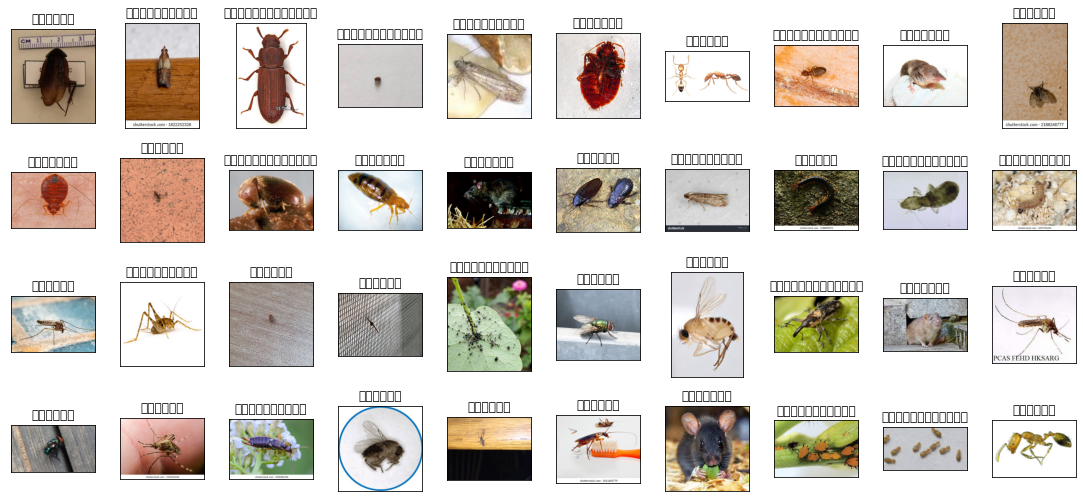

In [41]:
# 데이터 확인
fig, axes = plt.subplots(nrows=4, ncols=10, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.Filepath[i]))
    ax.set_title(df.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4359 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4449 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4367 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4465 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4357 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4466 missing from current font.
  font.set_text(s

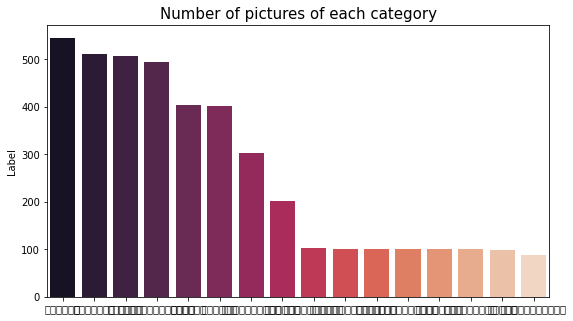

In [42]:
# Label Category 분포 확인
vc = df['Label'].value_counts()
plt.figure(figsize=(9,5))
sns.barplot(x = vc.index, y = vc, palette = "rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

In [43]:
# 이미지 데이터 Train, Test 데이터로 분류
train_df,test_df = train_test_split(df, test_size=0.1,random_state=1234)
train_df.shape,test_df.shape

((3744, 2), (416, 2))

### 베이스라인 모델

In [44]:
# 모델 전처리
import numpy as np
import tensorflow as tf


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split=0.2)

train_gen = train_datagen.flow_from_directory('/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/',
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',subset='training')
val_gen  = train_datagen.flow_from_directory('/content/drive/Shareddrives/졸업프로젝트/임시)대분류로/',
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',subset='validation')

Found 3218 images belonging to 16 classes.
Found 797 images belonging to 16 classes.


In [47]:
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[150, 150, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=16, activation='softmax'))

# Compiling the CNN
cnn.compile(optimizer = 'adam', 
            loss = 'categorical_crossentropy', 
            metrics = ['accuracy'])
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 41472)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [48]:
cnn.fit(x = train_gen, validation_data = val_gen, epochs = 10)

Epoch 1/10
 98/101 [============================>.] - ETA: 3s - loss: 2.5624 - accuracy: 0.1784

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


101/101 [==============================] - 137s 1s/step - loss: 2.5533 - accuracy: 0.1796 - val_loss: 2.3206 - val_accuracy: 0.2208
Epoch 2/10
101/101 [==============================] - 113s 1s/step - loss: 1.9926 - accuracy: 0.3306 - val_loss: 2.2680 - val_accuracy: 0.2673
Epoch 3/10
101/101 [==============================] - 109s 1s/step - loss: 1.6537 - accuracy: 0.4375 - val_loss: 2.2340 - val_accuracy: 0.2610
Epoch 4/10
101/101 [==============================] - 116s 1s/step - loss: 1.3127 - accuracy: 0.5634 - val_loss: 2.3221 - val_accuracy: 0.3124
Epoch 5/10
101/101 [==============================] - 108s 1s/step - loss: 0.8789 - accuracy: 0.7256 - val_loss: 2.4891 - val_accuracy: 0.2798
Epoch 6/10
101/101 [==============================] - 113s 1s/step - loss: 0.5588 - accuracy: 0.8310 - val_loss: 3.1037 - val_accuracy: 0.2610
Epoch 7/10
101/101 [==============================] - 109s 1s/step - loss: 0.3232 - accuracy: 0.9080 - val_loss: 3.3200 - val_accuracy: 0.3124
Epoch 8/10

### Convert to Tensorflow-Lite 